# NumPy

## 1. NumPyで何ができるか

- テンソル（Tensor）型
- テンソル型変数を用いる数学関数モジュール

数学関数モジュールは、説明不要でしょう。$cos$などの三角関数や$average$などの統計関数などです。ただし、入力（引数）変数や出力変数がテンソル型です。

テンソルとは、多次元数値配列のことで、多次元アレイ(nd-array)とも言います。（ただし、後述するように本当は「多次元」ではなく「多階」が正しい）


## 2. テンソル(Tensor)

1つの数値をスカラーといいます。$3.14$や$-5$とか$1+1j$とか、そういう普通の数値です。

このスカラーを複数並べたものを「ベクトル」といいます。pythonでは「リスト」を使います。
つまり、

In [19]:
L = [3.14, -5, 1+1j]

のように数値を並べると、

（注）`[`と`]`はリストを作る操作

In [20]:
print(L[1])

-5


のように、ベクトルの1番目の要素を参照することができます。$N$個の要素が並んだベクトルは$N$次元ベクトルといい、$N$個の軸で構成される空間上の**ただ1点**を表現します。

また、ベクトルを複数並べたものを行列といいます。

行列は、たとえば

$ M = \begin{bmatrix}1 & 2 & 3 \\ 4 & 5 & 6\end{bmatrix}$ 

は、2行3列の行列ですが、

この場合もリストを用いることができます。つまり、リストの要素に複数のリストを並べて、

In [21]:
L1 = [1,2,3]
L2 = [4,5,6]
M = [L1,L2] # もしくは M = [ [1,2,3], [4,5,6] ]

`M`は行列であり、`M`の1番目のベクトルは

In [22]:
print(M[1])

[4, 5, 6]


のように参照されます。よってさらに`M`の0番目のベクトルの2番目の要素（つまりMの0行2列目）は

In [23]:
print(M[0][2])

3


というように参照されることもわかると思います。

ここまでをまとめると、次のようになります。

- `x` ： スカラー
- `L=[x1, x2, x3, ....]` ： ベクトル, indexを1つ指定するとスカラー参照
- `M=[L1, L2, L3, ...]` : 行列、indexを1つ指定するとベクトル参照、2つ指定するとスカラー参照

このしくみを一般化したものがテンソルです。スカラーを参照するために必要なindexの数を「階(rank)」といいます。

- スカラー：0階テンソル
- ベクトル：1階テンソル
- 行列：2階テンソル

注意ですが、階は次元とは異なります。要素が5個あるベクトルを5次元ベクトルといいますが、ベクトルである限り1階です。同様に5行6列の行列も、行列である限り、階は2です。

また、これは大変重要な注意事項ですが、

> - 行ベクトル（横ベクトル）や列ベクトル（縦ベクトル）は、ベクトル（1階テンソル）ではなく行列（2階テンソル）です。
> - それらは、行か列の次元が「1」である行列です。1階テンソル（ベクトル）には行とか列とか縦とか横とかがありません。

In [24]:
X = [1,2,3] # 1階テンソル（3次元ベクトル）
Y = [[1,2,3]] # 2階テンソル（1行3列行列、いわゆる行ベクトル）
Z = [[1], [2], [3]] # 2階テンソル（3行1列行列、いわゆる列ベクトル）

上記のX,Y,Zで2を参照するには、

In [25]:
print(X[1],Y[0][1],Z[1][0])

2 2 2


のように行ベクトルや列ベクトルではindexを2つ指定しなければいけません。

## 3. NumPyの数学関数

python は、もともと数学関数モジュール`math` を備えています。

In [26]:
import math

print(math.cos(3.14/3))

0.5004596890082058


では、なぜわざわざNumPyパッケージが数学関数モジュールを用意しているのか。

それは、NumPyの数学関数モジュールは、引数にテンソルを与えることができ、一挙に答えをテンソルで返してくれるからです。

In [27]:
L = [3.14/2, 3.14/3]
print(math.cos(L))

TypeError: must be real number, not list

上記のようにpythonがもともと備えている`math`モジュールでは、リストを一挙に関数を適用できません。

しかし、NumPyの数学関数モジュールはできます。

In [28]:
import numpy as np 

L = [3.14/2, 3.14/3]
print(np.cos(L))

[0.00079633 0.50045969]


これがNumpyの数学関数モジュールのモチベーションです。プログラムによる複雑なシミュレーション処理ではこのようなテンソル全体を一挙に計算するようなことが普通ですので、NumPyは大切なのです。

ところで、正しくは、NumPyの数学関数は、「リストを一挙に計算できる」のではなく、「テンソルを一挙に計算できる」ものです。

リストとテンソルは何が違うのか？？

**テンソルは同じ階にある要素の数（次元）が等しいリストです。**

リストに含まれる要素は、同じ型でなくてもよいことになっています。つまり、0番目の要素はスカラー、1番目の要素はベクトルなんてことができます。

In [29]:
L = [3.14, [1,2,3], 'hello']

In [30]:
print(L[0])
print(L[1])
print(L[2])

3.14
[1, 2, 3]
hello


上記のLは0番目の要素がスカラー、1番目の要素がベクトル、2番目の要素が文字列です。参照した結果もそうなっていますね。

0番目の要素の1番目の要素

In [32]:
print(L[0][1])

TypeError: 'float' object is not subscriptable

スカラーなので、その1番目の要素などありません。

1番目のベクトルの1番目の要素は

In [33]:
print(L[1][1])

2


ベクトルなので、その1番目の要素は存在すれば表示されます。

2番目の文字列の1番目の要素は

In [34]:
print(L[2][1])

e


文字列も一種のリスト（文字のリスト）なので、1番目の文字が参照されます。

このように **リストでは、同じ階で次元（要素の数）や階数が異なる要素が格納できる**ようになっています。

ただし、このようなリストは、NumPyの数学関数を適用できません。NumPyの数学関数を適用できるのは、同じ階で次元が等しく、さらに型（クラス）も等しい、リストである必要があります。

2階テンソル、すなわち行列を考えると、行列というのは行ごとの列数が同じですよね。また、行列に含まれる要素はすべて同じ型ですよね。そういうことです。



## 4. NumPyのテンソル演算

NumPyの数学関数は、pythonがもとから備えている`math`モジュールにはできないテンソルを相手にした一挙計算ができる、といいましたが、
テンソルに対する演算子も定義されています。

つまり、NumPyが定義するテンソルクラスには、まずは、テンソルに対する四則演算を`+`/`-`/`*`/`/`でおこなえるように定義されています。

ただし、リストではなく、Numpyテンソルクラスに変換しておく必要があります。リストをNumpyテンソルクラス(array)に変換するにはnumpyのarrayメソッド（arrayクラスの`__init__()`メソッド）を使います。

### 4.1. テンソル加算

リストの加算`+`は、リストをつなげます。

テンソルの加算をしたい場合は、numpy.arrayメソッドでリストをテンソルに変換しなければいけません。

In [35]:
M1 = [[1],[2],[3]]
M2 = [[4],[5],[6]]

print(M1 + M2)

[[1], [2], [3], [4], [5], [6]]


In [36]:
nM1 = np.array(M1)
nM2 = np.array(M2)

print(nM1 + nM2)

[[5]
 [7]
 [9]]


NumPyテンソルクラスには`__str__`メソッドも定義されているようですね。きちんと3行1列の行列の形で表しています。

### 4.2. テンソル乗算

リストは乗算 `*`ができません。

テンソルの乗算は、リストをテンソルに変換したあとで行います。

In [37]:
print(M1 * M2)

TypeError: can't multiply sequence by non-int of type 'list'

In [38]:
print(nM1 * nM2)

[[ 4]
 [10]
 [18]]


？？ `*`は行列の掛け算ではありません。3行1列の行列と3行1列の行列は掛け算できませんね。この`*`がおこなっている掛け算は、**要素積**（アダマール積）という掛け算です。

行列の掛け算（**行列積**）は、`.dot()`モジュールを使います。

In [40]:
print(nM1.dot(nM2))

ValueError: shapes (3,1) and (3,1) not aligned: 1 (dim 1) != 3 (dim 0)

3行1列と3行1列の組み合わせはならべられません、とのことです。転置は`.T`です。

In [41]:
print(nM1.T.dot(nM2))

[[32]]


答えの形は、1行1列の行列（2階テンソル）です（スカラーやベクトルではありません）

In [42]:
print(nM1.dot(nM2.T))

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


この行列積でできあがる要素は、次のようになっています。

`Z[i][j] = X[i][0]*Y[0][j] + X[i][1]*Y[1][j] + X[i][2]*Y[2][j] + ... + X[i][k]*Y[k][j] + `


In [43]:
nV1 = np.array([1,2,3])
nV2 = np.array([4,5,6])
print(nV1.dot(nV2))

32


行ベクトルや列ベクトルでなく、1階テンソルであるベクトルであれば、そもそも転置がなく、`.dot()`で直接内積がおこなえます。答えはスカラー（0階テンソル）となります。

 `Z = X[0]*Y[0] + .... + X[k]*Y[K] + ....`



1行3列行列（2階テンソル）と3次元ベクトル（1階テンソル）との `.dot()`積は、1次元ベクトル（1階テンソル）になります。

`Z[0] = X[0][0]*Y[0] + ... + X[0][k]*Y[k] + ...`

In [44]:
print(nM1.T.dot(nV2))

[32]


3次元ベクトル（1階テンソル）と3行1列行列（2階テンソル）との`.dot()`積も、1次元ベクトル（1階テンソル）になります。

`Z[0] = X[0]*Y[0][0] + X[k]*Y[k][0] + ...`

In [45]:
print(nV1.dot(nM2))

[32]


つまり、この`.dot()`積は、
- 1階.dot(1階)　は　0階
- 1階.dot(2階)　や　2階.dot(1階)　は　1階
- 2階.dot(2階)　は　2階
となります。

また、左側のテンソルの最も後ろの階のi番目と、右側の最も前のi番目を乗算したものを、すべてのiについて足し合わせたものとなります。

つまり、`Z[A][B][C][D] = Σ L[A][B][i] .dot R[i][C][D]` と一般化できます。

この`.dot()`積を使うと、いわゆる「写像」をおこなえます。

位置ベクトル$(x,y)=(1,2)$の点を原点中心に30度逆時計回りに回転させた点は、30度の回転行列$\mathbb{R}_{30}$と位置ベクトル$\mathbb{x}$の`.dot()`積となります。

In [46]:
R = np.array([[np.cos(np.pi/6), -np.sin(np.pi/6)], [np.sin(np.pi/6), np.cos(np.pi/6)]])
x = np.array([1,2])

arrayクラスは、`shape`属性に各階の次元数をタプルで保存しています。タプルの要素数がテンソルの階数になっています（`ndim`属性にも保存されています。）。

復習ですが、タプルは要素を`,`で区切ったものです。（リストは`[`と`]`でタプルを囲んだもの、セットは`{`と`}`でタプルを囲んだもの、でした）

要素が1個のタプルは `a = (2,)`のように表現します。1階テンソル、ベクトルです。

要素が2個のタプルは `b = (3,1)`のように表現されます。2階テンソル、行列（行ベクトル、列ベクトルも含まれる）です。

In [47]:
print(R,'は',R.ndim,'階テンソルで、各階の次元は',R.shape)
print(x,'は',x.ndim, '階テンソルで、各階の次元は',x.shape)

[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]] は 2 階テンソルで、各階の次元は (2, 2)
[1 2] は 1 階テンソルで、各階の次元は (2,)


In [48]:
y = R.dot(x)
print(y, y.shape)

[-0.1339746   2.23205081] (2,)


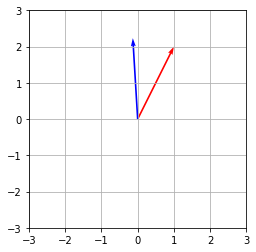

In [49]:
from matplotlib import pyplot as plt 

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.quiver(0,0,x[0],x[1],angles='xy',scale_units='xy',scale=1,color='red')
ax.quiver(0,0,y[0],y[1],angles='xy',scale_units='xy',scale=1,color='blue')
ax.grid()
ax.axes.set_aspect('equal')

### 4.3. テンソルのshapeを変える

- `A = np.array([1,2,3,4,5,6])`は1階テンソル（6次元ベクトル）で、`A.shape` は `(6,)`
- `B = np.array([[1,2,3,4,5,6]])`は2階テンソル（1行6列の行列、行ベクトル） で、`B.shape`は`(1,6)`
- `C = np.array([[1,2,3],[4,5,6]])`も2階テンソル(2行3列の行列）で、`C.shape`は`(2,3)`
- `D = np.array([[1,2],[3,4],[5,6]])`も2階テンソル（3行2列の行列）で、`D.shape`は`(3,2)`
- `E = np.array([[1],[2],[3],[4],[5],[6]])`も2階テンソル
- `F = np.array([[[1,2,3,4,5,6]]])`は3階テンソル(1x1x6)で`F.shape`は`(1,1,6)`

ですが、これらの各階の次元数の積が同じであるテンソルは`reshape()`関数で互いに変換することができます。

In [50]:
A =np.array([1,2,3,4,5,6])
A16 = np.reshape(A,(1,6)) 
print('===A16\n',A16,'\n')

# 2階とわかっているのなら、1つの階の次元数を指定すれば残った階の次元数は自動的に決まるので考えずに-1としておけば勝手にやってくれる
A1m = np.reshape(A,(1,-1))
print('===A1m\n',A1m,'\n')

A23 = np.reshape(A,(2,-1))
print('===A23\n',A23,'\n')

A32 = np.reshape(A,(3,-1))
print('===A32\n',A32,'\n')

A61 = np.reshape(A,(6,-1))
print('===A61\n',A61,'\n')

A116 = np.reshape(A,(1,1,-1))
print('===A116\n',A116,'\n')

===A16
 [[1 2 3 4 5 6]] 

===A1m
 [[1 2 3 4 5 6]] 

===A23
 [[1 2 3]
 [4 5 6]] 

===A32
 [[1 2]
 [3 4]
 [5 6]] 

===A61
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]] 

===A116
 [[[1 2 3 4 5 6]]] 



In [51]:
B =np.array([[1,2,3,4,5,6]])

B6 = np.reshape(B,(6,)) 
print('===B6\n',B6,'\n')

B23 = np.reshape(B,(2,-1))
print('===B23\n',B23,'\n')

B32 = np.reshape(B,(3,-1))
print('===B32\n',B32,'\n')

B61 = np.reshape(B,(6,-1))
print('===B61\n',B61,'\n')

B116 = np.reshape(B,(1,1,-1))
print('===B116\n',B116,'\n')

===B6
 [1 2 3 4 5 6] 

===B23
 [[1 2 3]
 [4 5 6]] 

===B32
 [[1 2]
 [3 4]
 [5 6]] 

===B61
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]] 

===B116
 [[[1 2 3 4 5 6]]] 



## 5. NumPyの典型的なテンソル作成関数

NumPyは、リストをテンソルクラスに変換するだけではない。

典型的なパターンのテンソルを作成することができる。たとえば、全0テンソル、全1テンソル、定ステップテンソル、乱数テンソル、単位テンソルなどである。

In [52]:
# 全０テンソル
Zero = np.zeros([2,3])
print(Zero,':',Zero.shape,'(',Zero.ndim,'階テンソル)')

[[0. 0. 0.]
 [0. 0. 0.]] : (2, 3) ( 2 階テンソル)


In [53]:
# 全１テンソル
One = np.ones([3,2])
print(One,':',One.shape,'(',One.ndim,'階テンソル)')

[[1. 1.]
 [1. 1.]
 [1. 1.]] : (3, 2) ( 2 階テンソル)


In [54]:
# 定ステップテンソル ：arg1と最初の行、arg2を最後の行として、等間隔で５行に拡大している
Lin = np.linspace([1.3,1.4], [10,13], 5)
print(Lin,':',Lin.shape,'(',Lin.ndim,'階テンソル)')

[[ 1.3    1.4  ]
 [ 3.475  4.3  ]
 [ 5.65   7.2  ]
 [ 7.825 10.1  ]
 [10.    13.   ]] : (5, 2) ( 2 階テンソル)


In [55]:
# 乱数テンソル
# [0,1]の一様分布に従う乱数テンソル
Ru = np.random.rand(2,3)
print(Ru,':',Ru.shape,'(',Ru.ndim,'階テンソル)')

[[0.04929492 0.37991251 0.52660015]
 [0.98822777 0.12657107 0.50448366]] : (2, 3) ( 2 階テンソル)


In [56]:
# 標準正規分布（平均 0,分散１）に従う乱数テンソル
Rn = np.random.randn(2,3)
print(Rn,':',Rn.shape,'(',Rn.ndim,'階テンソル)')

[[ 1.54334496e+00  3.62669114e-01 -6.46624095e-01]
 [ 6.76732065e-01  1.23462211e-03  1.10159042e-01]] : (2, 3) ( 2 階テンソル)


In [57]:
np.random.seed(100)
Rn1 = np.random.rand(2,3)
Rn2 = np.random.rand(2,3)
np.random.seed()

print('Rn1=',Rn1)
print('Rn2=',Rn2)

Rn1= [[0.54340494 0.27836939 0.42451759]
 [0.84477613 0.00471886 0.12156912]]
Rn2= [[0.67074908 0.82585276 0.13670659]
 [0.57509333 0.89132195 0.20920212]]


In [58]:
E = np.eye(3)
print(E,':',E.shape,'(',E.ndim,'階テンソル)')

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] : (3, 3) ( 2 階テンソル)


## 6. 課題

### 6.1. 課題1

連立方程式

$
x + 2 y = 3\\
5 x + 7 y = 9
$

の解となる$x$と$y$を求めよ。連立方程式は、写像と同じであり、ベクトル$\mathbb{a}=(x,y)$が写像行列$\mathbb{M}=\begin{bmatrix}1&2\\5&7\end{bmatrix}$によってベクトル$\mathbb{b}=(3,9)$に移されたことをあらわす。

$
\mathbb{M}\mathbb{a} = \mathbb{b}
$

よって、線形代数によると係数行列の逆行列が存在すれば、

$
\mathbb{a} = \mathbb{M}^{-1} \mathbb{b}
$

により、解$\mathbb{a}=(x,y)$を求めることができる。

numpyには行列を引数に与えると逆行列を求める関数があるので（自分で調べよ）、

「行列$\mathbb{M}$と行列$\mathbb{b}$を引数に与えると、解$\mathbb{a}$を返す関数」を自作し、それを用いて上記の連立方程式を解くpythonコードを作成せよ。

### 6.2. 課題２

- 1 → 3
- 2 → 5
- 3 → 7
- 4 → 9

のとき、10はどうなるか？
- 10 →　？

まず、入力$x$と出力出力$y$を繋ぐモデル式（適当な係数と、入出力の使い方）を作る。

今、パターンが４つわかっているので、入力を４つの未知変数に拡張し、４つの未知係数を用いて

$ y = a x^3 + b x^2 + c x + d $

などとしてみる。係数$a,b,c,d$の3次式モデルである。未知変数への拡張のしかたは他にもいくらでも考えられる。

$ y = a x^{-3} + b x^{-2} + c x^{-1} + d $

のようなモデル式でもいいだろう。

ひとまず３次式モデルとすると、与えられた４つのパターンは

$
\begin{bmatrix}
1 & 1 & 1 & 1\\
8 & 4 & 2 & 1\\
27 & 9 & 3 & 1\\
64 & 16 & 4 & 1
\end{bmatrix} \begin{bmatrix}
a\\
b\\
c\\
d
\end{bmatrix} = \begin{bmatrix}
3\\
5\\
7\\
9
\end{bmatrix}
$

と書くことができる。よって係数は

$
\begin{bmatrix}
a\\
b\\
c\\
d
\end{bmatrix} = \begin{bmatrix}
1 & 1 & 1 & 1\\
8 & 4 & 2 & 1\\
27 & 9 & 3 & 1\\
64 & 16 & 4 & 1
\end{bmatrix}^{-1} \begin{bmatrix}
3\\
5\\
7\\
9
\end{bmatrix}
$
で求めることができ、その係数を使えば、

10 →　？

を推定できる。


実際この方法で、係数は、$(a,b,c,d) = (0,0,2,1)$と推定され、$y　=　2 x + 1$。すなわち、10　→　21　と推定される。  

この推定値は、あくまで３次式モデルによる推定であり、他にも答えは考えられる。実際、先の逆数のモデルだと答えが異なる。

学習用のパターンを適当に４つ作り、適当にモデル式を作って係数を学習し、学習用パターンにない適当な入力を与えたときの出力を求めよ。（pythonコードで実現せよ）

## 6.3. 課題3

８ビットカラーのビットマップ画像は、画像上の１点を赤・緑・青の3原色それぞれをどの強さ（明度）で組み合わせるかで表す。たとえば、
- 真っ赤な1点は、次のように1次元目が255（8ビット2進数で$1111,1111(2)$,$FF(16)$）の3次元ベクトルで表される。

In [59]:
import numpy as np
from matplotlib import pyplot as plt

p0 = np.array([255,0,0])
print(p0,'\n',p0.shape)


[255   0   0] 
 (3,)


- 真緑、真っ青は、それぞれ`[0,255,0]`$(0,FF,0)$,`[0,0,255]`$(0,0,FF)$である。
- 真っ黒は、赤も緑も青も何の色も入っていない`[0,0,0]`$(0,0,0)$
- 真っ白は、赤・緑・青のすべてが最大限入っている`[255,255,255]`$(FF,FF,FF)$

画像の大きさが、縦４横６であれば、この１点のベクトルを4x6行列の要素として並べたテンソルとなる。

通常の4x6行列は、授業で解説したように、要素がスカラー（０階テンソル）であり、

In [60]:
M = np.array([[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18],[19,20,21,22,23,24]])
print(M,'\n',M.shape)

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]] 
 (4, 6)


縦４横６の画像は、この要素がベクトル（１階テンソル）となっている。 

In [63]:
pR = np.array([255,0,0]) # 真っ赤
pG = np.array([0,255,0]) # 真緑
pB = np.array([0,0,255]) # 真っ青
pW = np.array([255,255,255]) # 白
pK = np.array([0,0,0]) # 黒

G = np.array([ [pR, pG, pB, pW, pK, pR], [pG, pB, pW, pK, pR, pG], [pB, pW, pK, pR, pG, pB], [pW, pK, pR, pG, pB, pW]])

print(G, '\n', G.shape)


[[[255   0   0]
  [  0 255   0]
  [  0   0 255]
  [255 255 255]
  [  0   0   0]
  [255   0   0]]

 [[  0 255   0]
  [  0   0 255]
  [255 255 255]
  [  0   0   0]
  [255   0   0]
  [  0 255   0]]

 [[  0   0 255]
  [255 255 255]
  [  0   0   0]
  [255   0   0]
  [  0 255   0]
  [  0   0 255]]

 [[255 255 255]
  [  0   0   0]
  [255   0   0]
  [  0 255   0]
  [  0   0 255]
  [255 255 255]]] 
 (4, 6, 3)


画像Gは、4x6x3の３階テンソルとなっている。4x6の行列の各要素が３次元ベクトルである（対応を再確認）

画像を表示するには、matplotlibライブラリの pyplotモジュールを使える。vmin,vmaxには最小・最大の明度を指定する。

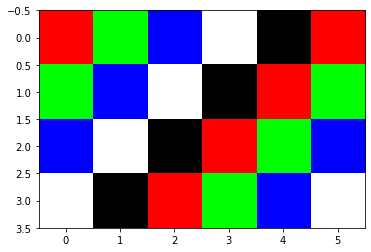

In [64]:
plt.imshow(G, vmin=0, vmax=255)
plt.show()

**これを次のようなデータフレームに変換せよ。**

行数は行番号と列番号の組み合わせだけあるので２４行なので、データは行番号と列番号の列を除くと、２４行３列となる。
numpyのreshape関数を使ってテンソルの形状を(4,6,3)から(24,3)に変換せよ。テンソルの形状を変換したのち、pandasのdataframeメソッドでデータフレームに変えることができる。

|行番号|列番号|赤明度|緑明度|青明度|
|---|---|---|---|---|
|0|0|255|0|0|
|0|1|0|255|0|
|:|:|:|:|:|
|0|5|255|0|0|
|1|0|0|255|0|
|:|:|:|:|:|
|3|4|0|0|255|
|3|5|255|255|255|